In [ ]:
# axon diameter via meshpary ray tracing
# https://meshparty.readthedocs.io/en/latest/source/meshparty.html#meshparty.skeletonize.ray_trace_distance

In [2]:
# import packages
import os
import numpy as np
import pandas as pd
import utils_EL as ut
import matplotlib.pyplot as plt
from meshparty import trimesh_io, meshwork, skeletonize, mesh_filters
from caveclient import CAVEclient



In [33]:
client = CAVEclient()
dataset = 'fanc_production_mar2021'
client = CAVEclient(dataset)

In [63]:
# create a dataframe with name and volume
directory = '/Users/ellenlesser/Desktop/MNmeshes/'

data = os.listdir(directory)
data = [elem.replace('L_meshwork.h5', '') for elem in data]

df = pd.DataFrame(data, columns=['name'])



In [64]:
# loop through names to load mesh and get volume
df['vol_um'] = ''
df['area_um'] = ''
i = 0
while i < len(df):
    root = df['name'][i]
    filename = root + 'L_meshwork.h5'
    file_dir = directory+filename
    nrn = meshwork.load_meshwork(file_dir)
    df['vol_um'][i] = nrn.mesh.volume / 1000000000
    df['area_um'][i] = nrn.mesh.area / 1000000
    i = i+1
df




,name,vol_um,area_um
0,tt,9127.704847,48731.385146
1,iii3,6402.550991,15789.486678
2,dtpmn_u,2219.88176,14573.879944
3,PS2_u,3465.910823,23708.989789
4,b1,14076.360724,43051.37857
5,PSI,5513.735491,15177.452718
6,DVM_1a,3515.351185,20211.093907
7,DLM_1,8115.215765,32633.055066
8,DVM_3b,2442.100441,11307.776914
9,PS_u,1367.466545,11135.392057


In [500]:
# find total number of synapses and number of partners
MN_df = pd.read_csv('/Users/ellenlesser/Desktop/pmn_env/CSVs/MNs_EL_040622.csv')
leftMN_df = MN_df[MN_df.side.isin(['L'])]


# thresh_syn = 3 # minimum synapse threshold to be considered a partner
# prepost = "pre" # "pre" to find presynaptic partners, "post" to find postsynaptic partners
# query_list = leftMN_df.SegID.to_list()# + [648518346495176886]

# syn_df = ut.build_synapse_df(query_list,prepost,thresh_syn,client) 
# postcounts = pd.DataFrame(syn_df['post_pt_root_id'].value_counts().rename_axis('SegID').reset_index(name='counts'))
# precounts = pd.DataFrame(syn_df['pre_pt_root_id'].value_counts().rename_axis('SegID').reset_index(name='counts'))

# if postcounts.shape[0] != len(query_list):
#     print('Warning: The following segIDs are not up to date')
#     print(list(set(query_list) - set(postcounts['SegID'])))



In [67]:
df

,name,vol_um,area_um,SegID
0,tt,9127.704847,48731.385146,648518346489942455
1,iii3,6402.550991,15789.486678,648518346509604297
2,dtpmn_u,2219.881760,14573.879944,648518346489660723
3,PS2_u,3465.910823,23708.989789,648518346497125761
4,b1,14076.360724,43051.378570,648518346481269135
5,PSI,5513.735491,15177.452718,648518346486137513
6,DVM_1a,3515.351185,20211.093907,648518346491784815
7,DLM_1,8115.215765,32633.055066,648518346515087943
8,DVM_3b,2442.100441,11307.776914,648518346488827114
9,PS_u,1367.466545,11135.392057,648518346472953700


In [68]:
# find total number of synapses and number of partners
# leftMN_df.SegID = leftMN_df.SegID.astype('string')
# df = df.merge(leftMN_df[['name','SegID']], how = 'left')
# df= df.fillna('648518346486137513') # temporary patch

df['tot_syn'] = ''
df['n_prepart'] = ''

i = 0
while i < len(df):
    iSeg = int(df['SegID'][i])
    temp_df = syn_df[syn_df.post_pt_root_id.isin([iSeg])]
    df['tot_syn'][i] = len(temp_df)
    df['n_prepart'][i] = len(temp_df.pre_pt_root_id.value_counts())
    i = i+1

df


/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,vol_um,area_um,SegID,tot_syn,n_prepart
0,tt,9127.704847,48731.385146,648518346489942455,1675,155
1,iii3,6402.550991,15789.486678,648518346509604297,4654,265
2,dtpmn_u,2219.881760,14573.879944,648518346489660723,5209,323
3,PS2_u,3465.910823,23708.989789,648518346497125761,8743,492
4,b1,14076.360724,43051.378570,648518346481269135,5436,318
5,PSI,5513.735491,15177.452718,648518346486137513,2421,264
6,DVM_1a,3515.351185,20211.093907,648518346491784815,4910,327
7,DLM_1,8115.215765,32633.055066,648518346515087943,7330,381
8,DVM_3b,2442.100441,11307.776914,648518346488827114,3933,295
9,PS_u,1367.466545,11135.392057,648518346472953700,2003,250


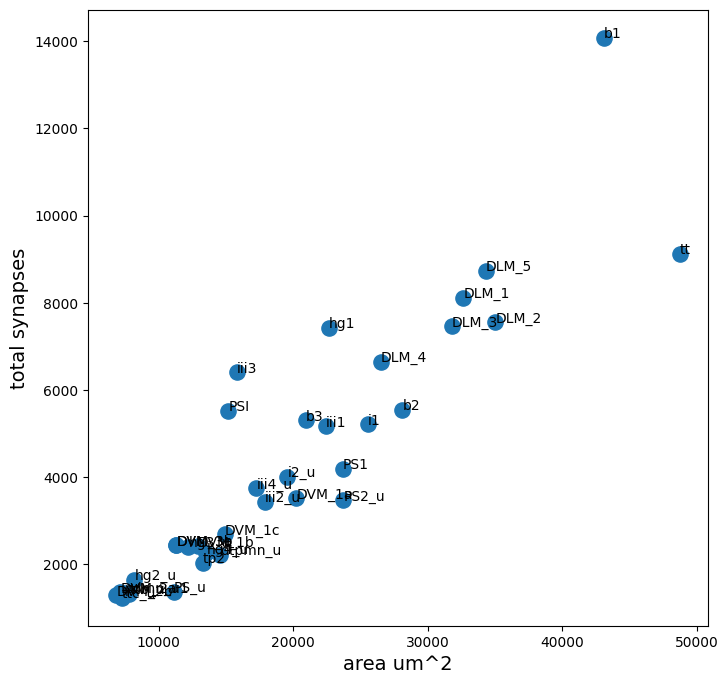

In [71]:
# xy plot of area vs volume
fig = plt.figure(1, figsize = [8,8])
plt.style.use('default')

df_plot = df

x_d = df.area_um
y_s = df.vol_um

# x_l = np.arange(0,1e12,1000)
# y_l = x_l

labels = df.name
labels = labels.reset_index(drop=True)

ymin = -0.01
ymax = 0.25

# plt.plot(x_l,y_l, color = "black", linewidth=.5)
plt.scatter(x_d,y_s, s = 120)

for i, txt in enumerate(labels):
    plt.annotate(txt, (x_d[i], y_s[i]))
    

# plt.ylim(ymin,ymax)
# plt.xlim(ymin,ymax)
plt.xlabel('area um^2', size = 14)
plt.ylabel('total synapses', size = 14)
# plt.yticks(np.arange(0, ymax+0.1, .1))
# plt.xticks(np.arange(0, ymax+0.1, .1))
# ax.set_xticks([0,0.25])
# plt.box(on = None)
# plt.savefig('descVsSense.svg', format='svg', bbox_inches='tight')


plt.show()

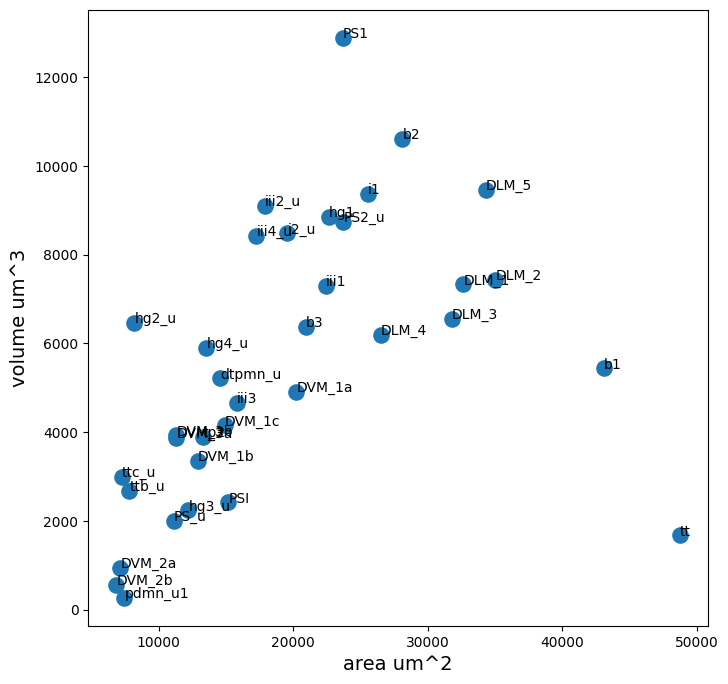

In [70]:
# xy plot of area vs volume
fig = plt.figure(1, figsize = [8,8])
plt.style.use('default')

df_plot = df

x_d = df.area_um
y_s = df.tot_syn

# x_l = np.arange(0,1e12,1000)
# y_l = x_l

labels = df.name
labels = labels.reset_index(drop=True)

ymin = -0.01
ymax = 0.25

# plt.plot(x_l,y_l, color = "black", linewidth=.5)
plt.scatter(x_d,y_s, s = 120)

for i, txt in enumerate(labels):
    plt.annotate(txt, (x_d[i], y_s[i]))
    

# plt.ylim(ymin,ymax)
# plt.xlim(ymin,ymax)
plt.xlabel('area um^2', size = 14)
plt.ylabel('volume um^3', size = 14)
# plt.yticks(np.arange(0, ymax+0.1, .1))
# plt.xticks(np.arange(0, ymax+0.1, .1))
# ax.set_xticks([0,0.25])
# plt.box(on = None)
# plt.savefig('descVsSense.svg', format='svg', bbox_inches='tight')


plt.show()

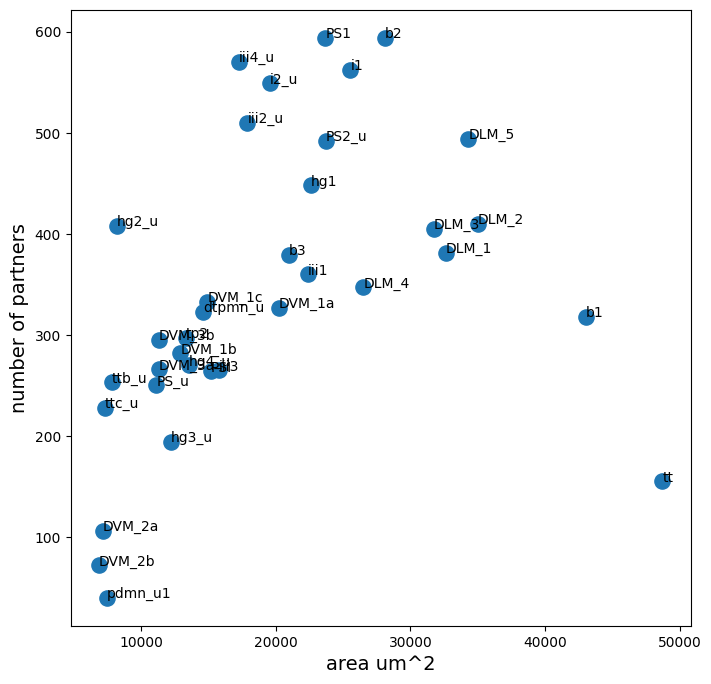

In [72]:
# xy plot of area vs volume
fig = plt.figure(1, figsize = [8,8])
plt.style.use('default')

df_plot = df

x_d = df.area_um
y_s = df.n_prepart

# x_l = np.arange(0,1e12,1000)
# y_l = x_l

labels = df.name
labels = labels.reset_index(drop=True)

ymin = -0.01
ymax = 0.25

# plt.plot(x_l,y_l, color = "black", linewidth=.5)
plt.scatter(x_d,y_s, s = 120)

for i, txt in enumerate(labels):
    plt.annotate(txt, (x_d[i], y_s[i]))
    

# plt.ylim(ymin,ymax)
# plt.xlim(ymin,ymax)
plt.xlabel('area um^2', size = 14)
plt.ylabel('number of partners', size = 14)
# plt.yticks(np.arange(0, ymax+0.1, .1))
# plt.xticks(np.arange(0, ymax+0.1, .1))
# ax.set_xticks([0,0.25])
# plt.box(on = None)
# plt.savefig('descVsSense.svg', format='svg', bbox_inches='tight')


plt.show()

In [ ]:
# now find axon diameters... ( for now, found manually and entered into MN spreadsheet)

In [501]:
leftMN_df.head()

,idx,sc_order,in_direct,behavior,tonic_phasic,side,name,description*,SegID,Dmax,Dmin
0,17,0,indirect,NaN,NaN,L,DLM_5,indirect_L_DLM 5,648518346472269618,2.90,1.95
1,22,1,indirect,NaN,NaN,L,DLM_4,indirect_L_DLM 4,648518346486629017,2.34,1.77
2,20,2,indirect,NaN,NaN,L,DLM_2,indirect_L_DLM 2,648518346486563887,3.00,1.57
3,21,3,indirect,NaN,NaN,L,DLM_3,indirect_L_DLM 3,648518346476906768,2.17,1.84
4,19,4,indirect,NaN,NaN,L,DLM_1,indirect_L_DLM 1,648518346515087943,2.53,2.48


In [503]:
# df = df.iloc[:,:-7]
leftMN_df.SegID = leftMN_df.SegID.astype('string')
df = df.merge(leftMN_df[['SegID','Dmax','Dmin']], how = 'left')
# df= df.fillna('648518346486137513') # temporary patch
df

/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,name,vol_um,area_um,SegID,tot_syn,n_prepart,Dmax,Dmin
0,tt,9127.704847,48731.385146,648518346489942455,1675,155,5.10,4.690
1,iii3,6402.550991,15789.486678,648518346509604297,4654,265,5.06,3.690
2,dtpmn_u,2219.881760,14573.879944,648518346489660723,5209,323,2.18,1.820
3,PS2_u,3465.910823,23708.989789,648518346497125761,8743,492,3.59,1.250
4,b1,14076.360724,43051.378570,648518346481269135,5436,318,6.18,5.360
5,PSI,5513.735491,15177.452718,648518346486137513,2421,264,5.95,3.790
6,DVM_1a,3515.351185,20211.093907,648518346491784815,4910,327,1.50,0.972
7,DLM_1,8115.215765,32633.055066,648518346515087943,7330,381,2.53,2.480
8,DVM_3b,2442.100441,11307.776914,648518346488827114,3933,295,1.62,1.600
9,PS_u,1367.466545,11135.392057,648518346472953700,2003,250,1.42,0.399


In [505]:
df['AxArea_um'] = 3.14*(df['Dmin']/2)*(df['Dmax']/2)
df

,name,vol_um,area_um,SegID,tot_syn,n_prepart,Dmax,Dmin,AxArea_um
0,tt,9127.704847,48731.385146,648518346489942455,1675,155,5.10,4.690,18.776415
1,iii3,6402.550991,15789.486678,648518346509604297,4654,265,5.06,3.690,14.657049
2,dtpmn_u,2219.881760,14573.879944,648518346489660723,5209,323,2.18,1.820,3.114566
3,PS2_u,3465.910823,23708.989789,648518346497125761,8743,492,3.59,1.250,3.522687
4,b1,14076.360724,43051.378570,648518346481269135,5436,318,6.18,5.360,26.002968
5,PSI,5513.735491,15177.452718,648518346486137513,2421,264,5.95,3.790,17.702143
6,DVM_1a,3515.351185,20211.093907,648518346491784815,4910,327,1.50,0.972,1.144530
7,DLM_1,8115.215765,32633.055066,648518346515087943,7330,381,2.53,2.480,4.925404
8,DVM_3b,2442.100441,11307.776914,648518346488827114,3933,295,1.62,1.600,2.034720
9,PS_u,1367.466545,11135.392057,648518346472953700,2003,250,1.42,0.399,0.444765


In [538]:
df.to_csv('leftMN_measurements.csv')

In [514]:
# df = df.merge(leftMN_df[['SegID','sc_order']], how = 'left')


In [535]:

b = ((3*(df.Dmax/2)) + (df.Dmin/2))*((df.Dmax/2) + (3*(df.Dmin/2)))

df['ax_perim'] = 3.14*((3*((df.Dmax/2) + (df.Dmin/2))) - np.sqrt(b))


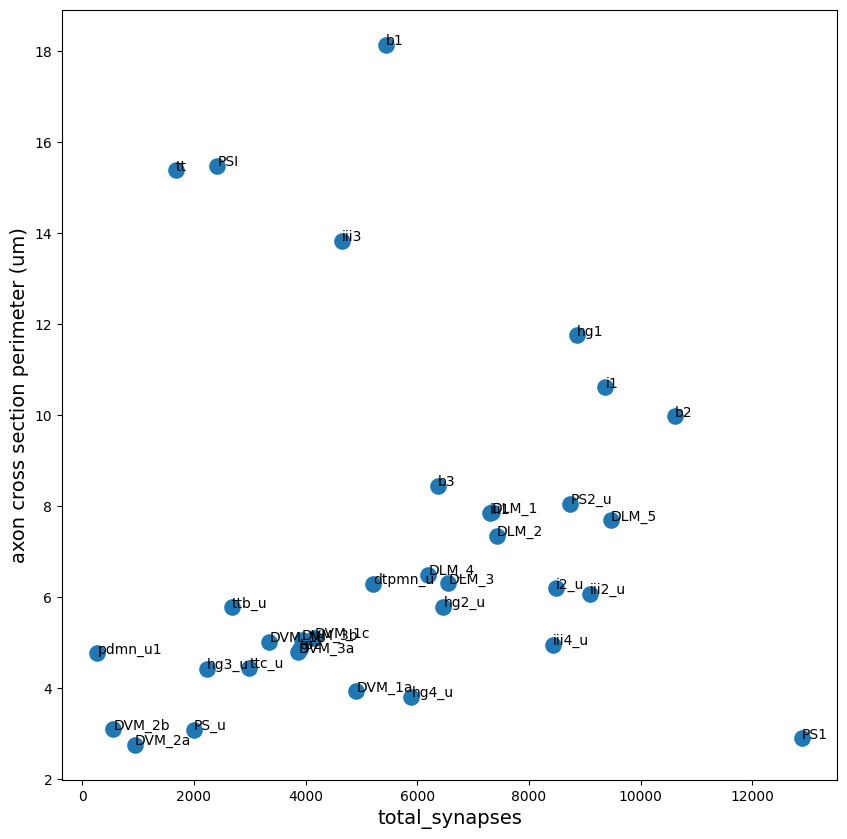

In [537]:
# xy plot of area vs volume
fig = plt.figure(1, figsize = [10,10])
plt.style.use('default')

df_plot = df

x_d = df.tot_syn
y_s = df.ax_perim

x_l = np.arange(0,7,0.5)
y_l = x_l

# labels = df.name
# labels = labels.reset_index(drop=True)

ymin = -0.01
ymax = 0.25

# plt.plot(x_l,y_l, color = "black", linewidth=.5)
plt.scatter(x_d,y_s, s = 120)

for i, txt in enumerate(labels):
    plt.annotate(txt, (x_d[i], y_s[i]))
    

# plt.ylim(ymin,ymax)
# plt.xlim(ymin,ymax)
plt.xlabel('total_synapses', size = 14)
plt.ylabel('axon cross section perimeter (um)', size = 14)
# plt.yticks(np.arange(0, ymax+0.1, .1))
# plt.xticks(np.arange(0, ymax+0.1, .1))
# ax.set_xticks([0,0.25])
# plt.box(on = None)
# plt.savefig('descVsSense.svg', format='svg', bbox_inches='tight')


plt.show()

In [73]:
def convert_to_vx(col, voxel_size=[4.3,4.3,45]):
    return np.vstack(col)/voxel_size

In [293]:
df.head()

,name,vol_um,area_um,SegID,tot_syn,n_prepart
0,tt,9127.704847,48731.385146,648518346489942455,1675,155
1,iii3,6402.550991,15789.486678,648518346509604297,4654,265
2,dtpmn_u,2219.881760,14573.879944,648518346489660723,5209,323
3,PS2_u,3465.910823,23708.989789,648518346497125761,8743,492
4,b1,14076.360724,43051.378570,648518346481269135,5436,318


In [462]:
df_axons = df

df_axons['diams_mean'] = ''
df_axons['diams_std'] = ''
df_axons['diams_n_pts'] = ''
df_axons['diams_cm_z'] = ''
df_axons['diams_xmin'] = ''

i = 0
while i < 2:#len(df):
    root = df_axons['name'].iloc[i]
    filename = root + 'L_meshwork.h5'
    file_dir = directory+filename
    nrn = meshwork.load_meshwork(file_dir)
    vx_vertices = convert_to_vx(nrn.vertices)
    vertices_df = pd.DataFrame(np.array(vx_vertices), columns=['x', 'y', 'z']).rename_axis('idx').reset_index()

    # find center of mass to roughly exclude soma points
    cm = nrn.mesh.center_mass
    df_axons['diams_cm_z'].iloc[i] = cm[2]/45
    # vertices_CMfiltered_df = vx_vertices_Xmask[vx_vertices_Xmask['z'] < cm[2]/45]

    # find right-most vertex to roughly determin nerve ending
    xmin = (cm[0]/4.3) - 5000
    df_axons['diams_xmin'].iloc[i] = xmin
    vx_vertices_Xmask = vertices_df[vertices_df['x'] < (xmin)]
    


    # # find minimum x to roughlt determine where nerve starts
    # oid = df_axons.SegID[i]
    # temp_df = syn_df[syn_df.post_pt_root_id.isin([int(oid)])].reset_index()
    # lst = temp_df.post_pt_position
    # xs = [item[0] for item in lst]
    # df_axons['diams_xmin'].iloc[i] = min(xs)
    # vx_vertices_Xmask = vertices_CMfiltered_df[vertices_CMfiltered_df['x'] < min(xs)]

    # vx_vertices_Xmask_XZmask = vx_vertices_Xmask[vx_vertices_Xmask['z'] < cm[2]/45]

    nerve_df = vx_vertices_Xmask 
    nerve_inds = nerve_df.idx.to_list()[::10]
    rs = skeletonize.ray_trace_distance(vertex_inds = nerve_inds, mesh = nrn.mesh, verbose = True)
    df_axons['diams_mean'].iloc[i] = np.mean(rs)
    df_axons['diams_std'].iloc[i] = np.std(rs)
    df_axons['diams_n_pts'].iloc[i] = len(rs)
    
    i = i+1

df_axons.head()



/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


9992
4
4
4
4
4
4
4
4
4
4


,name,vol_um,area_um,SegID,tot_syn,n_prepart,diams_mean,diams_std,diams_n_pts,diams_cm_z,diams_xmin
0,tt,9127.704847,48731.385146,648518346489942455,1675,155,NaN,NaN,0,2243.344464,5274.381922
1,iii3,6402.550991,15789.486678,648518346509604297,4654,265,2377.338297,1626.530628,9992,1774.773605,18726.958501
2,dtpmn_u,2219.881760,14573.879944,648518346489660723,5209,323,,,,,
3,PS2_u,3465.910823,23708.989789,648518346497125761,8743,492,,,,,
4,b1,14076.360724,43051.378570,648518346481269135,5436,318,,,,,


In [459]:
df_axons.head()

,name,vol_um,area_um,SegID,tot_syn,n_prepart,diams_mean,diams_std,diams_n_pts,diams_cm_z,diams_xmin
0,tt,9127.704847,48731.385146,648518346489942455,1675,155,632.906476,793.402216,1069198,2243.344464,6128.372093
1,iii3,6402.550991,15789.486678,648518346509604297,4654,265,1985.929422,1583.614092,257056,1774.773605,16953.488372
2,dtpmn_u,2219.881760,14573.879944,648518346489660723,5209,323,,,,1774.773605,16953.488372
3,PS2_u,3465.910823,23708.989789,648518346497125761,8743,492,,,,,
4,b1,14076.360724,43051.378570,648518346481269135,5436,318,,,,,


In [499]:
    nerve_inds = vertices_df.idx.to_list()[::10]
    rs = skeletonize.ray_trace_distance(vertex_inds = nerve_inds, mesh = nrn.mesh, verbose = True)
    print(np.mean(rs))
    print(np.std(rs))
    print(len(rs))

605
1
1
1
1
1
1
1
1
1
1
766.7321773583246
907.0623659790118
605


In [461]:
    oid = 648518346509604297
    # temp_df = syn_df[syn_df.post_pt_root_id.isin([int(oid)])].reset_index()
    # lst = temp_df.post_pt_position
    # xs = [item[0] for item in lst]
    # df_axons['diams_xmin'].iloc[i] = min(xs)
    # vx_vertices_Xmask = vertices_CMfiltered_df[vertices_CMfiltered_df['x'] < min(xs)]
    # len(vx_vertices_Xmask)
    root = 'tt'
    filename = root + 'L_meshwork.h5'
    file_dir = directory+filename
    nrn = meshwork.load_meshwork(file_dir)
    vx_vertices = convert_to_vx(nrn.vertices)

    xmin = min(vertices_df['x'])
    df_axons['diams_xmin'].iloc[i] = xmin
    vx_vertices_Xmask = vertices_df[vertices_df['x'] < (xmin + 5000)]
    
    cm = nrn.mesh.center_mass
    df_axons['diams_cm_z'].iloc[i] = cm[2]/45
    vertices_CMfiltered_df = vx_vertices_Xmask[vx_vertices_Xmask['z'] < cm[2]/45]
    cm

/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array([ 44179.84226632, 631993.78871811, 100950.50088056])

In [492]:
foci * [4.3,4.3,45]

array([[ 81807.5, 635363.7,  64845. ],
       [ 77731.1, 647739.1,  67230. ]])

In [493]:
foci

array([[ 19025, 147759,   1441],
       [ 18077, 150637,   1494]])

In [472]:
foci = np.array([[19025, 147759, 1441], [18077, 150637, 1494]])

In [494]:
mask = mesh_filters.filter_two_point_distance(nrn.mesh,(foci*[4.3,4.3,45]),1000)

In [495]:
vx = nrn.mesh.apply_mask(mask).vertices

In [496]:
unique, counts = np.unique(np.round(mask), return_counts=True)

print(np.asarray((unique, counts)).T)

[[0.00000e+00 1.59171e+06]
 [1.00000e+00 6.04800e+03]]


In [497]:
vertices_df = pd.DataFrame(np.array(convert_to_vx(vx)), columns=['x', 'y', 'z']).rename_axis('idx').reset_index()

vertices_df['combine'] = vertices_df[['x','y','z']].apply(lambda x: pd.Series([x.values]), axis=1)
vertices_df


,idx,x,y,z,combine
0,0,17820.000000,150224.651163,1472.8,"[17820.0, 150224.65116279072, 1472.8]"
1,1,17824.186047,150207.906977,1473.2,"[17824.18604651163, 150207.90697674418, 1473.2]"
2,2,17828.372093,150216.279070,1474.4,"[17828.372093023256, 150216.27906976745, 1474.4]"
3,3,17828.372093,150241.395349,1472.4,"[17828.372093023256, 150241.39534883722, 1472.4]"
4,4,17828.372093,150283.255814,1472.8,"[17828.372093023256, 150283.2558139535, 1472.8]"
...,...,...,...,...,...
6043,6043,19234.883721,147980.930233,1448.4,"[19234.883720930233, 147980.93023255814, 1448.4]"
6044,6044,19234.883721,148026.976744,1450.0,"[19234.883720930233, 148026.97674418605, 1450.0]"
6045,6045,19239.069767,148010.232558,1448.4,"[19239.069767441862, 148010.23255813954, 1448.4]"
6046,6046,19247.441860,148131.627907,1454.4,"[19247.44186046512, 148131.62790697676, 1454.4]"


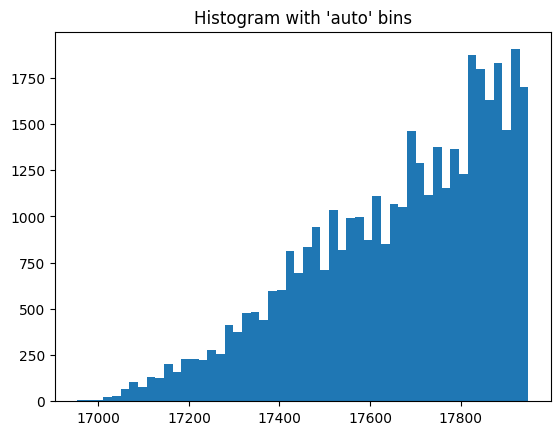

In [431]:
a = np.hstack(vx_vertices_Xmask['x'])
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
# plt.xlim(000,2000)
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

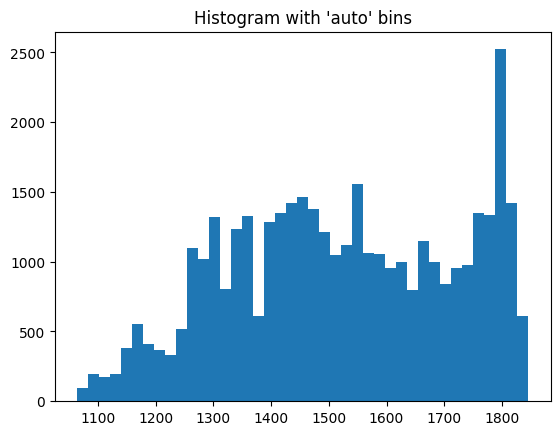

In [432]:
xs.sort()
a = np.hstack(vx_vertices_Xmask['z'])
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
# plt.xlim(000,2000)
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

In [433]:
oid

648518346489942455

In [251]:
print(min(ys))
print(max(ys))

114841
153141


In [430]:
temp_df = pd.DataFrame(np.arange(1,10).reshape(3,3))
temp_df['vert'] = pd.Series(vx_vertices)


ValueError: Data must be 1-dimensional

In [429]:
vx_vertices_Xmask

,idx,x,y,z
0,0,16953.488372,136314.418605,1273.2
1,1,16957.674419,136301.860465,1271.2
2,2,16961.860465,136314.418605,1271.2
3,3,16966.046512,136293.488372,1270.4
4,4,16966.046512,136318.604651,1274.4
...,...,...,...,...
39504,39504,17949.767442,157993.953488,1824.0
39505,39505,17949.767442,158010.697674,1820.4
39506,39506,17949.767442,158019.069767,1813.6
39507,39507,17949.767442,158019.069767,1818.4


In [498]:
import nglui
render_synapses = vertices_df #temp_df


from nglui.statebuilder import *

img_source = client.info.image_source()
img_layer = ImageLayerConfig(name='fanc_v4',
                             source=img_source,
                             )
seg_source = client.info.segmentation_source()

# seg_layer = SegmentationLayerConfig(name = 'seg',
#                                     source = seg_source,
#                                     fixed_ids = render_neurons)
points = PointMapper(point_column='combine') ######################## change this to toggle rendering of pre- or post- synaptic points
anno_layer = AnnotationLayerConfig(name='annos',
                                   mapping_rules=points )

# sb = StateBuilder([img_layer, seg_layer, anno_layer], resolution=[4.3,4.3,45])
sb = StateBuilder([img_layer, anno_layer], resolution=[4.3,4.3,45])

sb.render_state(render_synapses, return_as='html')

In [353]:
len(vertices_df)

1597758

In [352]:
len(vertices_CMfiltered_df['x'])

1597758

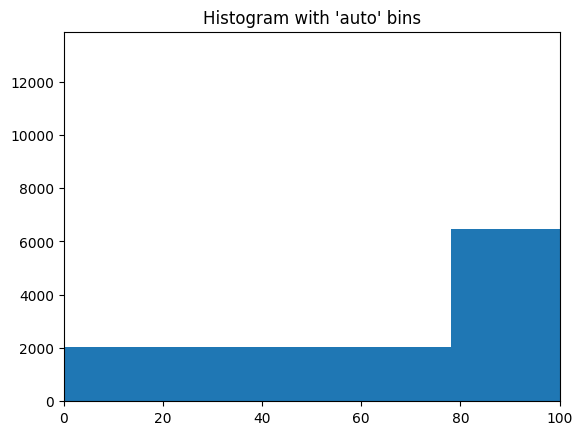

In [445]:
a = np.hstack(rs)
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlim(0,100)
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

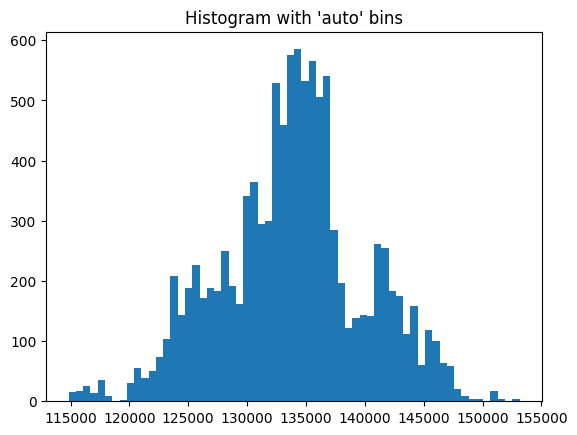

In [261]:
a = np.hstack(ys)
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
# plt.xlim(000,2000)
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

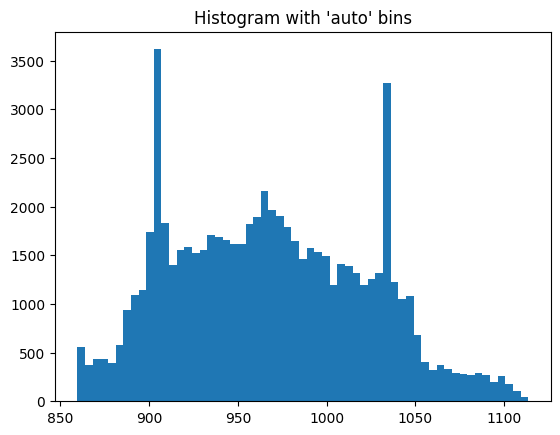

In [283]:
a = np.hstack(nerve_df['z'].to_list())
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
# plt.xlim(000,2000)
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

In [284]:
  nerve_inds = nerve_df.idx.to_list()
  
  rs = skeletonize.ray_trace_distance(vertex_inds = nerve_inds, mesh = nrn.mesh, verbose = True)

68309
10
10
10
10
10
10
10
10
10
10


In [274]:
nerve_df

,idx,x,y,z
0,0,1674.418605,118569.767442,906.0
1,1,1674.418605,118573.953488,906.0
2,2,1674.418605,118582.325581,906.0
3,3,1674.418605,118590.697674,906.0
4,4,1674.418605,118599.069767,906.0
...,...,...,...,...
1312,1312,1825.116279,118971.627907,906.0
1313,1313,1825.116279,119005.116279,881.6
1314,1314,1825.116279,119005.116279,898.0
1315,1315,1825.116279,119009.302326,895.2


In [289]:
np.std(rs[rs !=0])

959.7167856774062

In [290]:
np.std(rs)

959.9476738018651

In [187]:
np.max(rs)

163047.43155142653

In [291]:
np.mean(np.round(rs[rs != 0]))

1987.2773247046077

In [292]:
unique, counts = np.unique(np.round(rs[rs != 0]), return_counts=True)

print(np.asarray((unique, counts)).T)

[[2.0000e+00 1.0000e+00]
 [4.0000e+00 2.0000e+00]
 [5.0000e+00 2.0000e+00]
 ...
 [2.0116e+04 1.0000e+00]
 [2.0253e+04 1.0000e+00]
 [2.6173e+04 1.0000e+00]]


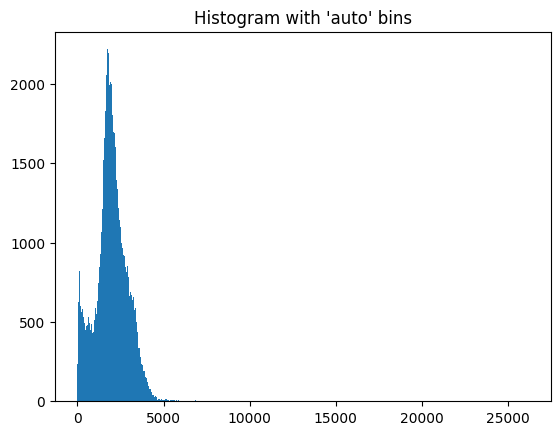

In [286]:
a = np.hstack(rs)
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
# plt.xlim(000,2000)
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

In [ ]:
a = np.hstack(rs)
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
# plt.xlim(000,2000)
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

In [ ]:
skeletonize.ray_trace_distance(vertex_inds = [4000], mesh = base_mesh, verbose = True)

In [171]:
nerve_df.to_csv('nerve_df.csv')

In [168]:
nerve_df['pts'] = "(" + nerve_df["x"].astype(str) + "," + nerve_df["y"].astype(str) + "," + nerve_df["z"].astype(str) + ")"
nerve_df["type"] = 'Point'

/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [177]:
nrn.mesh.center_mass / [4.3,4.3,45]

array([ 15085.35167677, 129616.17162434,   2019.12978432])

In [174]:
df.tail()

,name,vol_um,area_um,SegID,tot_syn,n_prepart
30,b3,5303.461712,20953.839322,648518346515574010,6373,379
31,iii1,5164.747278,22410.637206,648518346488622926,7297,360
32,pdmn_u1,1355.591960,7456.864037,648518346472328139,270,40
33,i2_u,4005.323871,19569.231786,648518346499256923,8481,549
34,b2,5550.818520,28103.866538,648518346493634040,10607,594


In [167]:
# constructing a new mesh

# oid = 648518346524051461
# seg_source = client.info.segmentation_source()

# mm = trimesh_io.MeshMeta(cv_path =seg_source,
#                          disk_cache_path='../meshes',map_gs_to_https=True)
# mesh_base = mm.mesh(seg_id = oid, remove_duplicate_vertices=True, merge_large_components=True)


71


/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Adding 43829 new edges.
TIME MERGING: 35.819s


In [219]:
def convert_to_vx(col, voxel_size=[4.3,4.3,45]):
    return np.vstack(col)/voxel_size

In [222]:
convert_to_vx(nrn.vertices)

array([[  6325.11627907, 139713.48837209,   2220.        ],
       [  6329.30232558, 139705.11627907,   2218.4       ],
       [  6333.48837209, 139684.18604651,   2221.2       ],
       ...,
       [ 38607.90697674, 139102.3255814 ,   2301.2       ],
       [ 38607.90697674, 139119.06976744,   2300.        ],
       [ 38628.8372093 , 139102.3255814 ,   2300.        ]])

In [220]:
convert_to_vx(nrn.vertices)

array([[  6521.86046512, 138759.06976744,   2174.4       ],
       [  6521.86046512, 138763.25581395,   2174.        ],
       [  6538.60465116, 138784.18604651,   2175.2       ],
       ...,
       [ 26547.90697674, 151660.46511628,   2806.4       ],
       [ 26568.8372093 , 151647.90697674,   2806.4       ],
       [ 26568.8372093 , 151652.09302326,   2805.6       ]])

In [166]:
mesh_anchor.vertices[4000]

TrackedArray([142938., 606168., 164196.])

In [171]:
skeletonize.ray_trace_distance(vertex_inds = [4000], mesh = base_mesh, verbose = True)

1


array([258.31823602])

In [185]:
skeletonize.ray_trace_distance(vertex_inds = [0,1,2,3], mesh = base_mesh, verbose = True)

4


array([147.87730334, 161.2222815 , 255.74214888, 240.99864292])

In [187]:
base_mesh.vertices/ voxel_size

TrackedArray([[ 23634.41860465, 136921.39534884,    685.2       ],
              [ 23642.79069767, 136896.27906977,    685.2       ],
              [ 23646.97674419, 136875.34883721,    681.2       ],
              ...,
              [ 53987.44186047, 116351.1627907 ,   1397.6       ],
              [ 53991.62790698, 116367.90697674,   1399.6       ],
              [ 54004.18604651, 116363.72093023,   1398.4       ]])

In [162]:
26016+((121.03631924/4.3)/2)

26030.073990609304

In [163]:
138336 + ((208.31144425/4.3)/2)

138360.2222609593

In [164]:
678 + ((661.3147595)/2)

1008.65737975

In [154]:
skeletonize.ray_trace_distance(vertex_inds = [36669, 133574, 1914], mesh = base_mesh, verbose = True)

3


array([245.47214684, 689.0674105 , 102.26543899])

In [109]:
np.savetxt("test.csv",np.round(base_mesh.vertices))

In [26]:
# Filter out mesh vertices that are not in the largest connected component
in_comp = mesh_filters.filter_largest_component(base_mesh)
mesh_anchor = base_mesh.apply_mask(in_comp)

In [27]:
mesh_anchor.is_watertight

False

In [29]:
mesh_anchor.fix_mesh()

In [30]:
mesh_anchor.is_watertight

True

In [95]:
convert_nm_to_vx(mesh_anchor.vertices)

array([[ 36586.04651163, 133421.86046512,   1893.2       ],
       [ 36556.74418605, 133601.86046512,   1914.        ],
       [ 36586.04651163, 133513.95348837,   1906.        ],
       ...,
       [ 37289.30232558, 131073.48837209,   1579.6       ],
       [ 37293.48837209, 131073.48837209,   1578.        ],
       [ 37293.48837209, 131073.48837209,   1579.2       ]])

In [96]:
convert_nm_to_vx(base_mesh.vertices)


array([[ 23634.41860465, 136921.39534884,    685.2       ],
       [ 23642.79069767, 136896.27906977,    685.2       ],
       [ 23646.97674419, 136875.34883721,    681.2       ],
       ...,
       [ 53987.44186047, 116351.1627907 ,   1397.6       ],
       [ 53991.62790698, 116367.90697674,   1399.6       ],
       [ 54004.18604651, 116363.72093023,   1398.4       ]])

In [44]:
def convert_df_to_nm(col, voxel_size=[4.3,4.3,45]):
    return np.vstack(col.values)*voxel_size

In [76]:
def convert_pts_to_nm(pts, voxel_size=[4.3,4.3,45]):
    return (pts)*voxel_size

In [50]:
def convert_nm_to_vx(col, voxel_size=[4.3,4.3,45]):
    return np.vstack(col)/voxel_size

In [114]:
nrn = meshwork.Meshwork(base_mesh, seg_id=648518346524051461)

In [ ]:
syn_in_df = client.materialize.synapse_query(pre_ids = oid)
nrn.add_annotations('syn_in', syn_in_df['post_pt_position'], point_column='ctr_pt_position')


In [115]:
nrn.skeletonize_mesh(soma_pt=[34024, 140869, 3674], soma_thresh_distance=8500)


  0%|          | 0/314942 [00:00<?, ?it/s]/Users/ellenlesser/opt/anaconda3/lib/python3.7/site-packages/meshparty/skeletonize.py:613: RuntimeWarning: invalid value encountered in multiply
  target = np.nanargmax(root_ds * valid)
100%|██████████| 314942/314942 [00:04<00:00, 69675.85it/s] 


In [118]:
skeletonize.vertex_properties()

AttributeError: module 'meshparty.skeletonize' has no attribute 'vertex_properties'

In [47]:
from meshparty.meshwork import algorithms

is_axon, qual = algorithms.split_axon_by_synapses(nrn, 
                                                  nrn.anno.syn_in.mesh_index,
                                                  nrn.anno.syn_out.mesh_index,
                                                  )

# split_axon_by_synapses returns a skeleton mask, which we want to convert to a SkeletonIndex 
is_axon_skel = nrn.SkeletonIndex(np.flatnonzero(is_axon))

AttributeError: 'AnchoredAnnotationManager' object has no attribute 'syn_in'

In [9]:
mesh = trimesh_io.download_meshes(seg_ids = [648518346524051461], target_dir = '../meshes', cv_path = seg_source)


downloading 648518346524051461
file does not exist ../meshes/648518346524051461.h5


In [17]:
nrn_mesh.vertices.shape, nrn_mesh.faces.shape

((311864, 3), (623509, 3))

In [24]:
mm.mesh

<bound method MeshMeta.mesh of <meshparty.trimesh_io.MeshMeta object at 0x7fdd857af5d0>>

In [1]:
from meshparty import meshwork
from meshparty import trimesh_io, trimesh_vtk, skeletonize, mesh_filters
import numpy as np
import pandas as pd
import os

# Specify the base mesh:

oid = 648518346524051461

mm = trimesh_io.MeshMeta()
mesh_base = mm.mesh(filename=f'meshes/{oid}.h5')

# Filter out mesh vertices that are not in the largest connected component
in_comp = mesh_filters.filter_largest_component(mesh_base)
mesh_anchor = mesh_base.apply_mask(in_comp)

# The basic Meshwork takes the anchor mesh
nrn = meshwork.Meshwork(mesh_anchor, seg_id=oid)

AttributeError: 'NoneType' object has no attribute 'mesh'

In [20]:
nrn_mesh.skeleton

AttributeError: 'Mesh' object has no attribute 'skeleton'

In [8]:
nrn_mesh.is_watertight


False

In [4]:
meshmeta = trimesh_io.MeshMeta()
mesh = meshmeta.mesh(path_to_mesh) # mesh gets cached

local_vertices = mesh.get_local_view(n_points, pc_align=True, method="kdtree")


NameError: name 'path_to_mesh' is not defined

3


array([105.92051849, 389.03172264, 198.57024133])

In [3]:
nrn_mw = meshwork(nrn_mesh, seg_id=648518346524051461,voxel_resolution=[4.3,4.3,45])


TypeError: 'module' object is not callable

In [51]:
skeletonize.ray_trace_distance(vertex_inds = [27079, 123554, 887], mesh = motor_neuron_mesh, verbose = True)

3


array([ 239.06411073,  343.57597895, 1012.0665886 ])

In [39]:
meshmeta = trimesh_io.MeshMeta()
meshmeta.mesh(nrn) # mesh gets cached

local_vertices = mesh.get_local_view(n_points, pc_align=True, method="kdtree")

AttributeError: 'NoneType' object has no attribute 'mesh'

In [36]:
nrn.is_watertight


AttributeError: 'Meshwork' object has no attribute 'is_watertight'

In [ ]:
mesh.volume
mesh.area
mesh.center_mass

In [15]:
from meshparty import trimesh_io

meshmeta = trimesh_io.MeshMeta()
mesh = meshmeta.mesh(path_to_mesh) # mesh gets cached



NameError: name 'path_to_mesh' is not defined

SyntaxError: invalid syntax (<ipython-input-13-19f94354d043>, line 1)